In [35]:
import numpy as np
import scipy.io
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

def dataloader(path):
    data = scipy.io.loadmat(path)
    AF = data['AF']
    modified_rows1 = AF[:-2]
    last_rows1 = AF[-2:]
    CF = data['CF']
    concatenated_array = np.concatenate((modified_rows1, CF,last_rows1), axis=0)
    new=concatenated_array
    u, count = np.unique(new[-1], return_counts=True)
    a = u[np.logical_or(count < 2, count > 2)]
    c = new[:, np.isin(new[-1], a, invert=True)]
    x = c[0:-2]; y = c[-2]; w = c[-1];
    return x.T, y.T, w.T, data['CF_info']

def calculate_accuracy(arr1, arr2):
    count = sum(1 for itr1, itr2 in zip(arr1, arr2) if itr1 == itr2)
    return count / len(arr1)

def normalization(feats):
    df = pd.DataFrame(feats)
    scaler = StandardScaler()
    x_new = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return x_new

def make_partitions(arr_words, arr_labels):
    v = []
    temp = []

    for i in range(len(arr_words) - 1):
        word = arr_words[i]
        next_word = arr_words[i + 1]
        temp.append(arr_labels[i])

        if word != next_word or i == len(arr_words) - 2:
            if i == len(arr_words) - 2:
                temp.append(arr_labels[i + 1])

            numpy_temp = np.array(temp)
            temp_max = np.amax(numpy_temp)
            numpy_temp = np.divide(numpy_temp, temp_max)
            v = np.concatenate((v, numpy_temp), axis=None)
            temp.clear()

    v1 = [1 if i == 1 else 0 for i in v]
    return v1
    
fatyp = 'TypicalFA_comb1'
drivepath = 'finalData/'+ fatyp +'/';
filee = drivepath+'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
original_dim = 38
train_path = filee; test_path = filee.replace('train','test')
xtrain, ytrain, wtrain1, info_train1 = dataloader(train_path);
xtest, ytest, wtest1, info_test1 = dataloader(test_path);
xtest= normalization(xtest)
xtrain= normalization(xtrain)

woPP=[]; wPP=[]
input_shape1 = (19,1)
input_shape2 = (38,1)
temperature = 0.03
learning_rate=0.001

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


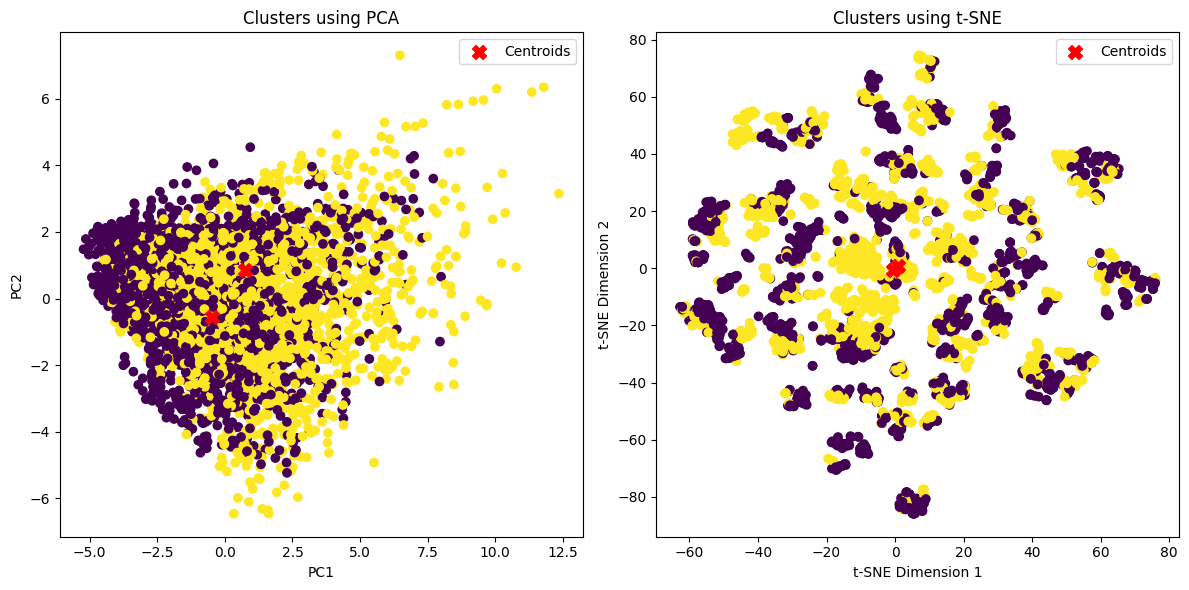

In [36]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN
# Assuming centroids is a numpy array containing the centroid coordinates
k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(xtrain)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ytrain, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=ytrain, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


# Combined

In [3]:
fatyp = 'TypicalFA_comb1'
drivepath = 'finalData/'+ fatyp +'/';
#featFiles = 'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress'               #glob.glob(drivepath + '*train*')
filee = drivepath+'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
original_dim=38

train_path = filee; test_path = filee.replace('train','test')
xtrainG, ytrainG, wtrain1, info_train1 = dataloader(train_path);
xtestG, ytestG, wtest1, info_test1 = dataloader(test_path);
xtestG = normalization(xtestG)
xtrain1G = normalization(xtrainG)

fatyp = 'TypicalFA_comb1'
drivepath = 'finalData/'+ fatyp +'/';
#featFiles = 'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress'               #glob.glob(drivepath + '*train*')
filee = drivepath+'ITA_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
original_dim=38

train_path = filee; test_path = filee.replace('train','test')
xtrainI, ytrainI, wtrain1, info_train1 = dataloader(train_path);
xtestI, ytestI, wtest1, info_test1 = dataloader(test_path);
xtestI = normalization(xtestI)
xtrainI = normalization(xtrainI)


In [4]:
xfinal = np.concatenate((xtrainG, xtrainI), axis=0)

In [5]:
yfinal=np.concatenate((ytrainG, ytrainI), axis=None)

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


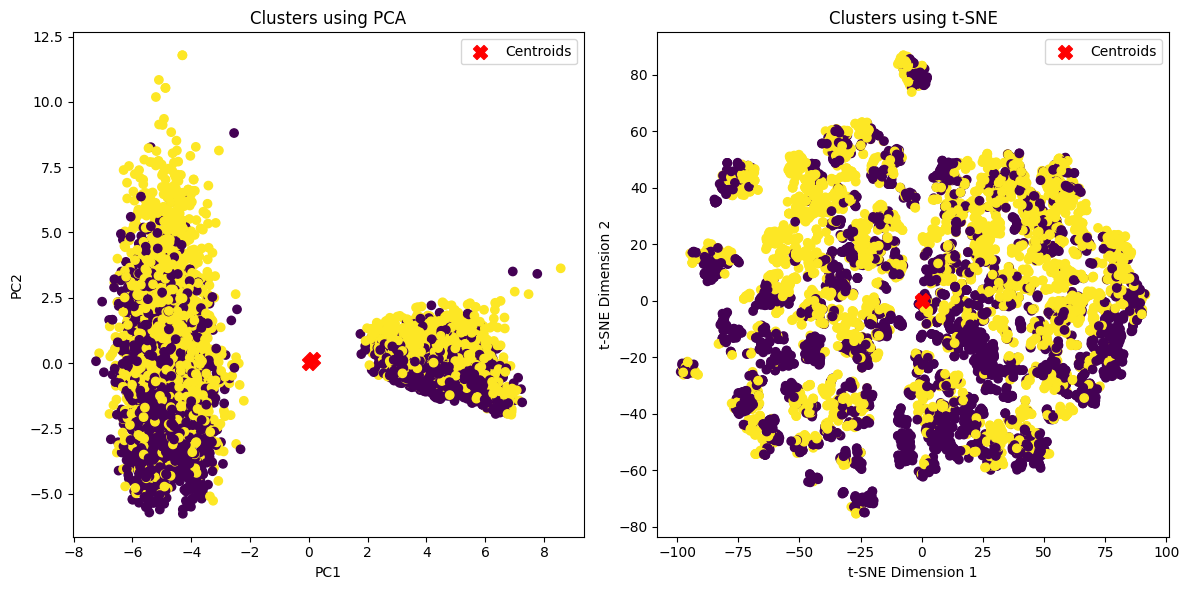

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN
# Assuming centroids is a numpy array containing the centroid coordinates
k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(xfinal)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xfinal)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xfinal)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=yfinal, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=yfinal, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


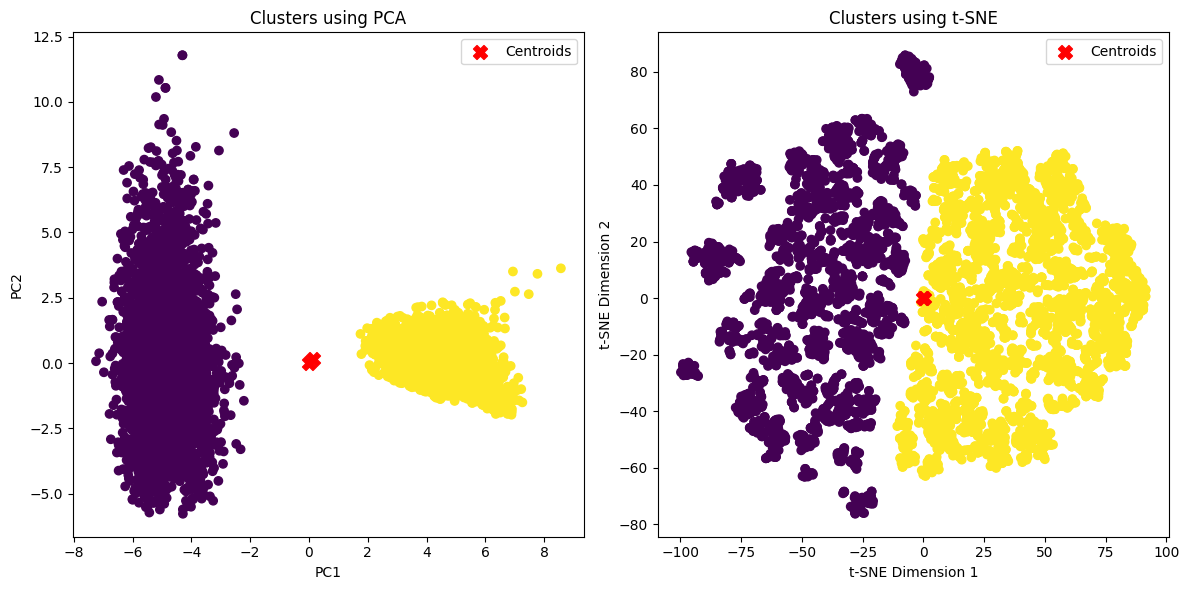

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN
# Assuming centroids is a numpy array containing the centroid coordinates
k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(xfinal)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xfinal)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xfinal)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [9]:
import os
import glob
import numpy as np
import scipy.io
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import tensorflow_addons as tfa
import pandas as pd
import matplotlib.pyplot as plt
adam = tf.keras.optimizers.Adam(learning_rate=0.0005)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
import scipy.io as sio
from keras.layers import Reshape
from keras.callbacks import ModelCheckpoint, EarlyStopping
temperature = 0.03
learning_rate = 0.001


# Implementing Contrastive Loss (N-Pair)

In [10]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=temperature, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        print(feature_vectors.shape)
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        logits = tf.divide(tf.matmul(feature_vectors_normalized, tf.transpose(feature_vectors_normalized)), self.temperature)
        return 0.35*(tfa.losses.npairs_loss(tf.squeeze(labels), logits))

In [11]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xtrainI, ytrainI, test_size=0.2, random_state=42)
input_shape = (38,1)

In [12]:
class Encoder(Model):
  def __init__(self, latent_dim):
    super(Encoder, self).__init__()
    input_shape = (38,1)
    self.latent_dim = latent_dim 
    inputs = Input(shape=(38,1))
    outputs = inputs  
    self.encoder = tf.keras.Sequential([
      inputs,
      
      layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Dropout(0.5),
      layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    return encoded

latent_dim=30

def create_encoder():
    return Encoder(latent_dim)


def add_projection_head(Encoder):
    inp = keras.Input(shape=input_shape)
    hidden  = Encoder(inp)
    features = layers.Dense(16, activation="relu")(hidden)
    model = keras.Model(
        inputs=inp, outputs=features, name="cifar-encoder_with_projection-head"
    )
    return model

encoder = create_encoder()
encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate),loss=SupervisedContrastiveLoss(temperature))
encoder_with_projection_head.summary()
history = encoder_with_projection_head.fit(xtra_a, ytra_a , validation_data =(xval_a,yval_a), batch_size=32, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

Model: "cifar-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 38, 1)]           0         
                                                                 
 encoder (Encoder)           (None, 30)                38910     
                                                                 
 dense_1 (Dense)             (None, 16)                496       
                                                                 
Total params: 39,406
Trainable params: 39,406
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
(None, 16)
(None, 16)


2023-06-14 14:23:09.196552: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-14 14:23:09.973572: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f7244059e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-14 14:23:09.973605: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-06-14 14:23:09.978359: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-14 14:23:10.120996: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


87/87 [==============================] - 5s 9ms/step - loss: 1.3000 - val_loss: 1.1999
Epoch 2/100
87/87 [==============================] - 0s 5ms/step - loss: 1.2005 - val_loss: 1.1883
Epoch 3/100
87/87 [==============================] - 0s 5ms/step - loss: 1.1902 - val_loss: 1.1802
Epoch 4/100
87/87 [==============================] - 0s 5ms/step - loss: 1.1832 - val_loss: 1.1770
Epoch 5/100
87/87 [==============================] - 0s 4ms/step - loss: 1.1788 - val_loss: 1.1757
Epoch 6/100
87/87 [==============================] - 0s 5ms/step - loss: 1.1745 - val_loss: 1.1732
Epoch 7/100
87/87 [==============================] - 0s 5ms/step - loss: 1.1727 - val_loss: 1.1708
Epoch 8/100
87/87 [==============================] - 0s 5ms/step - loss: 1.1690 - val_loss: 1.1658
Epoch 9/100
87/87 [==============================] - 0s 4ms/step - loss: 1.1647 - val_loss: 1.1641
Epoch 10/100
87/87 [==============================] - 0s 4ms/step - loss: 1.1633 - val_loss: 1.1615
Epoch 11/100
87/87 [=

In [16]:
trainoutputs = encoder_with_projection_head.predict(xtrainI)

109/109 [==============================] - 0s 1ms/step


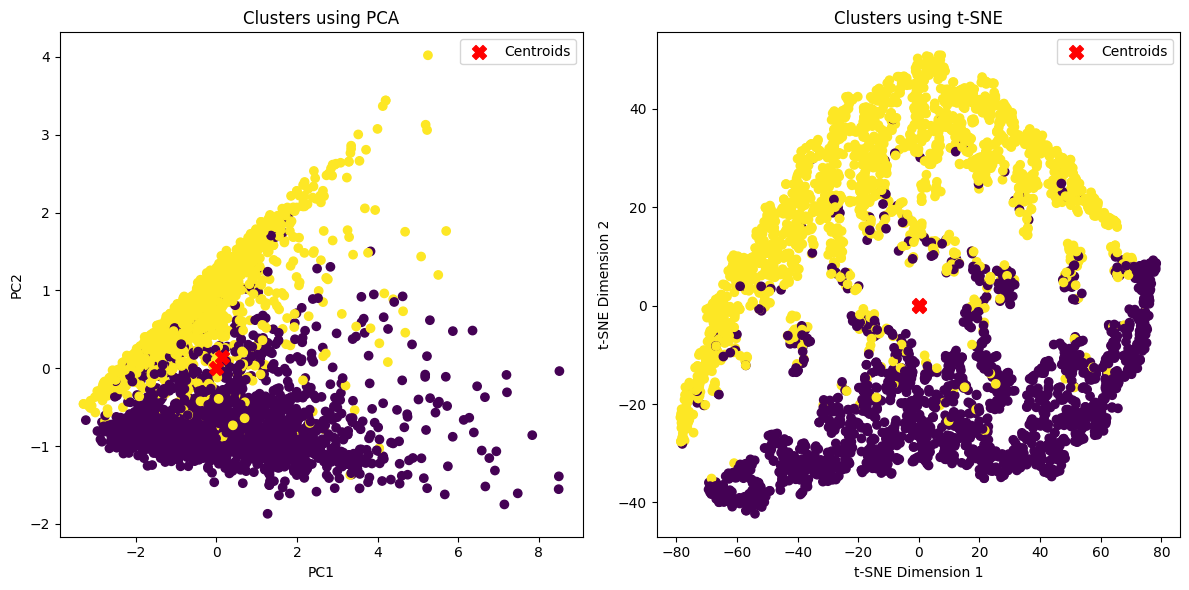

In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN
# Assuming centroids is a numpy array containing the centroid coordinates

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(trainoutputs)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(trainoutputs)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ytrainI, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=ytrainI, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Combined

In [18]:
fatyp = 'TypicalFA_comb1'
drivepath = 'finalData/'+ fatyp +'/';
#featFiles = 'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress'               #glob.glob(drivepath + '*train*')
filee = drivepath+'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
original_dim=38

train_path = filee; test_path = filee.replace('train','test')
xtrainG, ytrainG, wtrain1, info_train1 = dataloader(train_path);
xtestG, ytestG, wtest1, info_test1 = dataloader(test_path);
xtestG = normalization(xtestG)
xtrain1G = normalization(xtrainG)

fatyp = 'TypicalFA_comb1'
drivepath = 'finalData/'+ fatyp +'/';
#featFiles = 'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress'               #glob.glob(drivepath + '*train*')
filee = drivepath+'ITA_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
original_dim=38

train_path = filee; test_path = filee.replace('train','test')
xtrainI, ytrainI, wtrain1, info_train1 = dataloader(train_path);
xtestI, ytestI, wtest1, info_test1 = dataloader(test_path);
xtestI = normalization(xtestI)
xtrainI = normalization(xtrainI)

xfinal = np.concatenate((xtrainG, xtrainI), axis=0)
yfinal=np.concatenate((ytrainG, ytrainI), axis=None)

In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xfinal, yfinal, test_size=0.2, random_state=42)
input_shape = (38,1)


class Encoder(Model):
  def __init__(self, latent_dim):
    super(Encoder, self).__init__()
    input_shape = (38,1)
    self.latent_dim = latent_dim 
    inputs = Input(shape=(38,1))
    outputs = inputs  
    self.encoder = tf.keras.Sequential([
      inputs,
      
      layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Dropout(0.5),
      layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    return encoded

latent_dim=30

def create_encoder():
    return Encoder(latent_dim)


def add_projection_head(Encoder):
    inp = keras.Input(shape=input_shape)
    hidden  = Encoder(inp)
    features = layers.Dense(16, activation="relu")(hidden)
    model = keras.Model(
        inputs=inp, outputs=features, name="cifar-encoder_with_projection-head"
    )
    return model

encoder = create_encoder()
encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate),loss=SupervisedContrastiveLoss(temperature))
encoder_with_projection_head.summary()
history = encoder_with_projection_head.fit(xtra_a, ytra_a , validation_data =(xval_a,yval_a), batch_size=32, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

Model: "cifar-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 38, 1)]           0         
                                                                 
 encoder_1 (Encoder)         (None, 30)                38910     
                                                                 
 dense_3 (Dense)             (None, 16)                496       
                                                                 
Total params: 39,406
Trainable params: 39,406
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
(None, 16)
(None, 16)
186/186 [==============================] - 2s 6ms/step - loss: 1.2461 - val_loss: 1.2088
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 1.2090 - val_loss: 1.2048
Epoch 3/100
186/186 [==============================] - 1s 4ms/step -

109/109 [==============================] - 0s 1ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


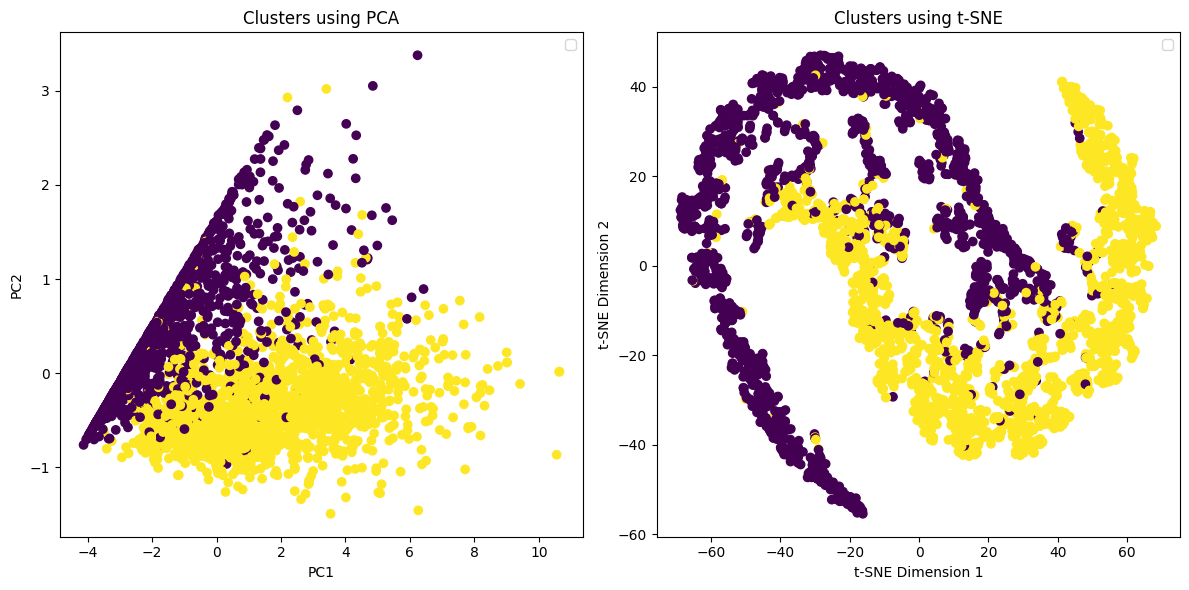

In [21]:
trainoutputs = encoder_with_projection_head.predict(xtrainI)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN
# Assuming centroids is a numpy array containing the centroid coordinates

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(trainoutputs)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(trainoutputs)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ytrainI, cmap='viridis')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=ytrainI, cmap='viridis')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

124/124 [==============================] - 0s 1ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


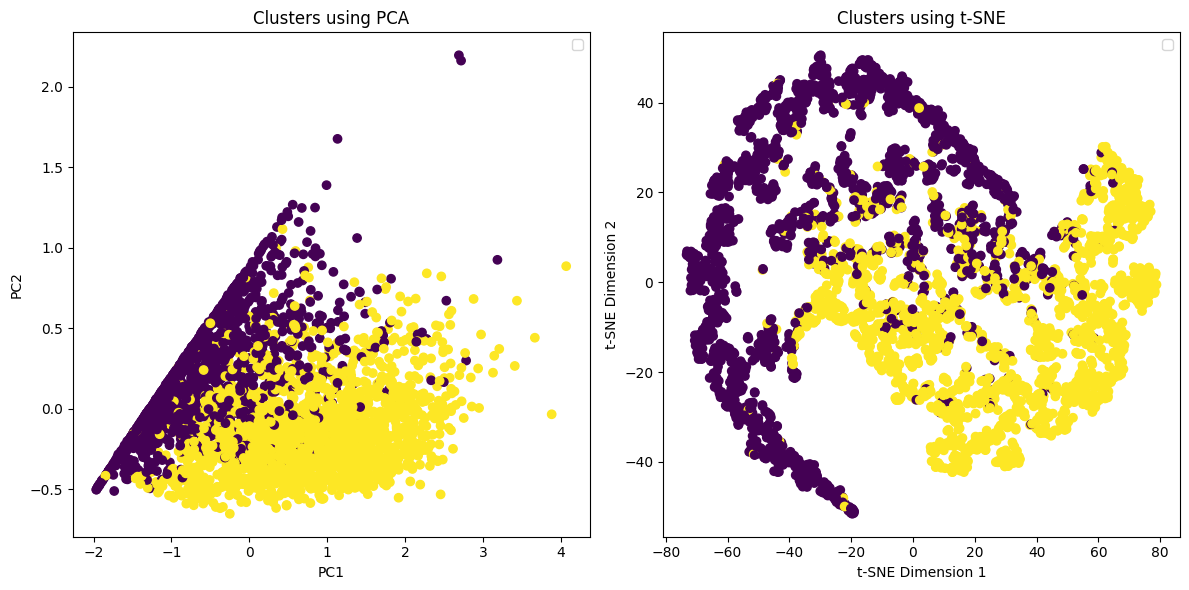

In [23]:
trainoutputs = encoder_with_projection_head.predict(xtrainG)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN
# Assuming centroids is a numpy array containing the centroid coordinates

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(trainoutputs)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(trainoutputs)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ytrainG, cmap='viridis')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=ytrainG, cmap='viridis')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Cross

In [31]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xtrainG, ytrainG, test_size=0.2, random_state=42)
input_shape = (38,1)


class Encoder(Model):
  def __init__(self, latent_dim):
    super(Encoder, self).__init__()
    input_shape = (38,1)
    self.latent_dim = latent_dim 
    inputs = Input(shape=(38,1))
    outputs = inputs  
    self.encoder = tf.keras.Sequential([
      inputs,
      
      layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Dropout(0.5),
      layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    return encoded

latent_dim=30

def create_encoder():
    return Encoder(latent_dim)


def add_projection_head(Encoder):
    inp = keras.Input(shape=input_shape)
    hidden  = Encoder(inp)
    features = layers.Dense(16, activation="relu")(hidden)
    model = keras.Model(
        inputs=inp, outputs=features, name="cifar-encoder_with_projection-head"
    )
    return model

encoder = create_encoder()
encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate),loss=SupervisedContrastiveLoss(temperature))
encoder_with_projection_head.summary()
history = encoder_with_projection_head.fit(xtra_a, ytra_a , validation_data =(xval_a,yval_a), batch_size=32, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

Model: "cifar-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 38, 1)]           0         
                                                                 
 encoder_4 (Encoder)         (None, 30)                38910     
                                                                 
 dense_9 (Dense)             (None, 16)                496       
                                                                 
Total params: 39,406
Trainable params: 39,406
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
(None, 16)
(None, 16)
100/100 [==============================] - 2s 5ms/step - loss: 1.2550 - val_loss: 1.2080
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 1.2091 - val_loss: 1.2016
Epoch 3/100
100/100 [==============================] - 0s 4ms/step -

109/109 [==============================] - 0s 1ms/step


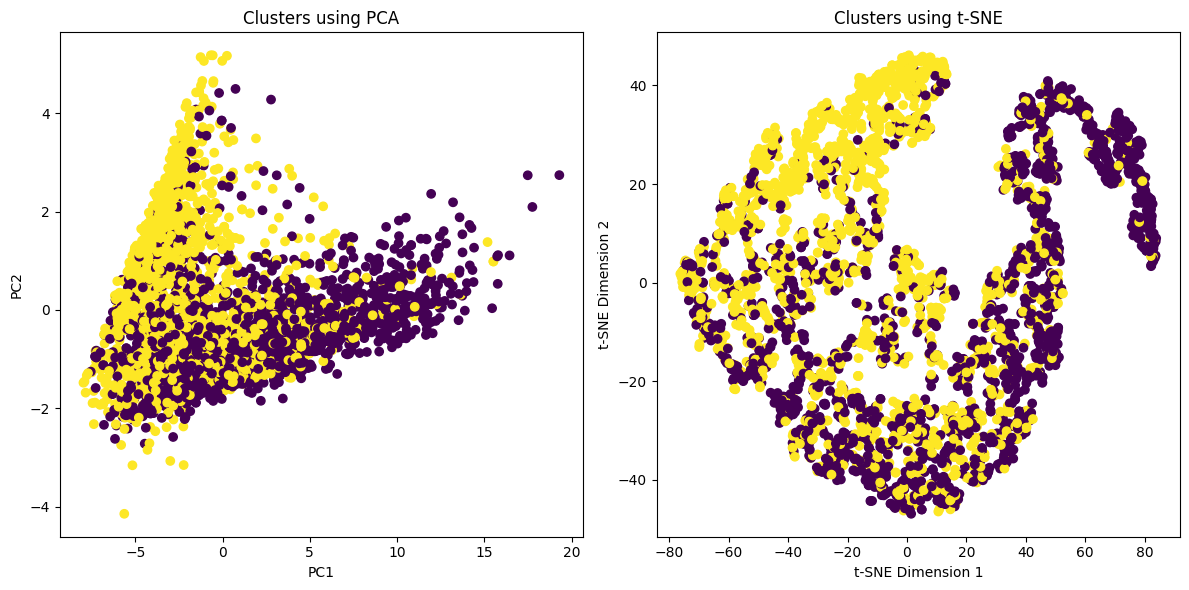

In [32]:
# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN
# Assuming centroids is a numpy array containing the centroid coordinates
trainoutputs = encoder_with_projection_head.predict(xtrainI)
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(trainoutputs)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(trainoutputs)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ytrainI, cmap='viridis')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=ytrainI, cmap='viridis')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Display the plot
plt.tight_layout()
plt.show()


In [33]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xtrainI, ytrainI, test_size=0.2, random_state=42)
input_shape = (38,1)


class Encoder(Model):
  def __init__(self, latent_dim):
    super(Encoder, self).__init__()
    input_shape = (38,1)
    self.latent_dim = latent_dim 
    inputs = Input(shape=(38,1))
    outputs = inputs  
    self.encoder = tf.keras.Sequential([
      inputs,
      
      layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Dropout(0.5),
      layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    return encoded

latent_dim=30

def create_encoder():
    return Encoder(latent_dim)


def add_projection_head(Encoder):
    inp = keras.Input(shape=input_shape)
    hidden  = Encoder(inp)
    features = layers.Dense(16, activation="relu")(hidden)
    model = keras.Model(
        inputs=inp, outputs=features, name="cifar-encoder_with_projection-head"
    )
    return model

encoder = create_encoder()
encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate),loss=SupervisedContrastiveLoss(temperature))
encoder_with_projection_head.summary()
history = encoder_with_projection_head.fit(xtra_a, ytra_a , validation_data =(xval_a,yval_a), batch_size=32, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

Model: "cifar-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 38, 1)]           0         
                                                                 
 encoder_5 (Encoder)         (None, 30)                38910     
                                                                 
 dense_11 (Dense)            (None, 16)                496       
                                                                 
Total params: 39,406
Trainable params: 39,406
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
(None, 16)
(None, 16)
87/87 [==============================] - 2s 6ms/step - loss: 1.2693 - val_loss: 1.2038
Epoch 2/100
87/87 [==============================] - 0s 4ms/step - loss: 1.2016 - val_loss: 1.1905
Epoch 3/100
87/87 [==============================] - 0s 5ms/step - loss:

124/124 [==============================] - 0s 2ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


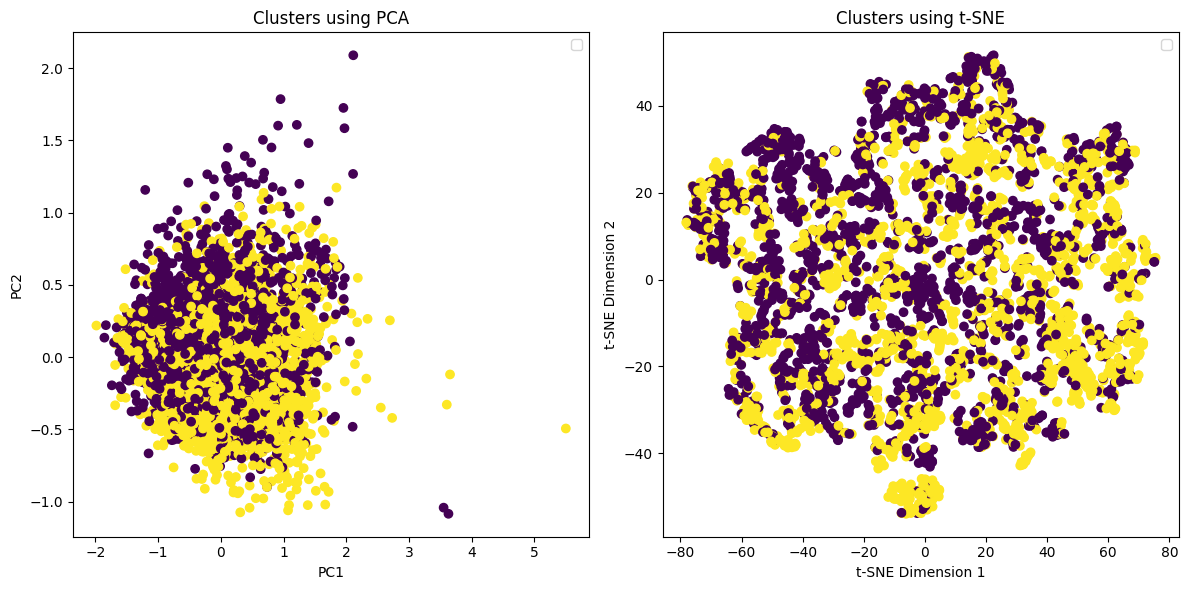

In [34]:
trainoutputs = encoder_with_projection_head.predict(xtrainG)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN
# Assuming centroids is a numpy array containing the centroid coordinates

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(trainoutputs)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(trainoutputs)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ytrainG, cmap='viridis')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=ytrainG, cmap='viridis')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()